In [1]:
# weather_api_key


In [2]:
!pip install citipy




# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [5]:
# Print the city 
print(cities)

['new norfolk', 'ostrovnoy', 'metro', 'kirakira', 'mataura', 'ilulissat', 'cidreira', 'fortuna', 'harper', 'nyurba', 'racine', 'yerbogachen', 'tanda', 'hobart', 'baie-saint-paul', 'victoria', 'komatipoort', 'vaitupu', 'fort saint john', 'albany', 'ushuaia', 'punta arenas', 'vostok', 'isangel', 'santander', 'kapaa', 'griffith', 'busselton', 'ajtos', 'norman wells', 'nuevo progreso', 'hansot', 'yellowknife', 'tsihombe', 'nauta', 'paamiut', 'georgetown', 'bacuit', 'port alfred', 'pula', 'deputatskiy', 'cockburn town', 'shenjiamen', 'sitka', 'hithadhoo', 'jamestown', 'hermanus', 'rikitea', 'hambantota', 'belushya guba', 'alofi', 'taolanaro', 'shieli', 'manaus', 'saldanha', 'damghan', 'waw', 'wamba', 'bethel', 'utiroa', 'puerto ayora', 'khatanga', 'kashin', 'ust-nera', 'avarua', 'tezu', 'lasa', 'pevek', 'klaksvik', 'bredasdorp', 'atuona', 'port elizabeth', 'road town', 'tursunzoda', 'college', 'maragogi', 'kasongo-lunda', 'bollnas', 'chokurdakh', 'jacareacanga', 'vaini', 'pacific grove', 'c

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print (query_url)

http://api.openweathermap.org/data/2.5/weather?appid=e4889e29c6b9b4e3914195aa7e24ffde&units=Imperial&q=


In [7]:
# Mini version of cities for testing and to limit API calls
cities_sample = []
i = 0
while i < 4:
  cities_sample.append(cities[i])
  i += 1
print (cities_sample)


['new norfolk', 'ostrovnoy', 'metro', 'kirakira']


In [8]:
# Loop through the list of cities and perform a request for data on each
# create dictionary object to hold lists
# weather_dict 

city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
date_list = []
country_list =[]
counter = 0
record_counter = 0
setcount = 1


for city in cities:
    counter += 1
    if (counter % 50 == 0):
        setcount += 1
        record_counter = 0
        print(setcount)
        print(record_counter)
        print(counter)
    record_counter += 1
    print("processing Record " + str(record_counter) + " of Set " + str(setcount) + " | " + city)
    try:
        weather_response = requests.get(query_url + city).json()
        print(weather_response)
        city_list.append(weather_response['name'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        max_temp_list.append(weather_response['main']['temp_max'])
        humidity_list.append(weather_response['main']['humidity'])
        cloudiness_list.append(weather_response['clouds']['all'])
        windspeed_list.append(weather_response['wind']['speed'])
        country_list.append(weather_response['sys']['country'])
        date_list.append(weather_response['dt'])
    
    except:
        print("City not found: " + city)
        
        
print(len(weather_response))
 

processing Record 1 of Set 1 | new norfolk
{'coord': {'lon': 147.0587, 'lat': -42.7826}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 64.81, 'feels_like': 64.85, 'temp_min': 63.72, 'temp_max': 67.91, 'pressure': 1012, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 332, 'gust': 11.41}, 'clouds': {'all': 100}, 'dt': 1651192286, 'sys': {'type': 2, 'id': 2031307, 'country': 'AU', 'sunrise': 1651179536, 'sunset': 1651216752}, 'timezone': 36000, 'id': 2155415, 'name': 'New Norfolk', 'cod': 200}
processing Record 2 of Set 1 | ostrovnoy
{'coord': {'lon': 39.5131, 'lat': 68.0531}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 16.05, 'feels_like': 3.45, 'temp_min': 16.05, 'temp_max': 16.05, 'pressure': 1011, 'humidity': 85, 'sea_level': 1011, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 19.71,

{'coord': {'lon': -70.4986, 'lat': 47.4411}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 41.27, 'feels_like': 36.27, 'temp_min': 40.77, 'temp_max': 45.45, 'pressure': 1014, 'humidity': 84, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 7.74, 'deg': 337, 'gust': 16.44}, 'clouds': {'all': 100}, 'dt': 1651192291, 'sys': {'type': 1, 'id': 311, 'country': 'CA', 'sunrise': 1651138205, 'sunset': 1651189716}, 'timezone': -14400, 'id': 6690232, 'name': 'Baie-Saint-Paul', 'cod': 200}
processing Record 16 of Set 1 | victoria
{'coord': {'lon': 114.1577, 'lat': 22.2855}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 82.04, 'feels_like': 89.94, 'temp_min': 80.94, 'temp_max': 84.96, 'pressure': 1011, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 8.99, 'deg': 70}, 'clouds': {'all': 18}, 'dt': 16511

{'coord': {'lon': -97.95, 'lat': 23.1667}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 78.78, 'feels_like': 78.78, 'temp_min': 78.48, 'temp_max': 79.54, 'pressure': 1013, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 112, 'gust': 11.01}, 'clouds': {'all': 17}, 'dt': 1651192297, 'sys': {'type': 2, 'id': 2033166, 'country': 'MX', 'sunrise': 1651147229, 'sunset': 1651193868}, 'timezone': -18000, 'id': 3522526, 'name': 'Nuevo Progreso', 'cod': 200}
processing Record 32 of Set 1 | hansot
{'coord': {'lon': 72.8, 'lat': 21.5833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 85.55, 'feels_like': 86.97, 'temp_min': 85.55, 'temp_max': 85.55, 'pressure': 1009, 'humidity': 49, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 4.99, 'deg': 338, 'gust': 6.89}, 'clouds': {'all': 0}, 'dt': 1651

{'coord': {'lon': 19.2345, 'lat': -34.4187}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 60.19, 'feels_like': 60.19, 'temp_min': 60.19, 'temp_max': 60.19, 'pressure': 1013, 'humidity': 91, 'sea_level': 1013, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 5.86, 'deg': 227, 'gust': 7.83}, 'clouds': {'all': 100}, 'dt': 1651192303, 'sys': {'country': 'ZA', 'sunrise': 1651209404, 'sunset': 1651248235}, 'timezone': 7200, 'id': 3366880, 'name': 'Hermanus', 'cod': 200}
processing Record 48 of Set 1 | rikitea
{'coord': {'lon': -134.9692, 'lat': -23.1203}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 77.11, 'feels_like': 77.67, 'temp_min': 77.11, 'temp_max': 77.11, 'pressure': 1018, 'humidity': 67, 'sea_level': 1018, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 18.37, 'deg': 100, 'gust': 20.4}, 'clouds': {'

{'coord': {'lon': 143.2, 'lat': 64.5667}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 18.72, 'feels_like': 10.96, 'temp_min': 18.72, 'temp_max': 18.72, 'pressure': 1024, 'humidity': 78, 'sea_level': 1024, 'grnd_level': 962}, 'visibility': 10000, 'wind': {'speed': 5.46, 'deg': 33, 'gust': 5.41}, 'clouds': {'all': 18}, 'dt': 1651192308, 'sys': {'country': 'RU', 'sunrise': 1651169100, 'sunset': 1651229040}, 'timezone': 36000, 'id': 2120048, 'name': 'Ust-Nera', 'cod': 200}
processing Record 16 of Set 2 | avarua
{'coord': {'lon': -159.775, 'lat': -21.2078}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 82.45, 'feels_like': 89.37, 'temp_min': 82.45, 'temp_max': 82.45, 'pressure': 1014, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 90}, 'clouds': {'all': 40}, 'dt': 1651192309, 'sys': {'type': 1, 'id': 7271

{'coord': {'lon': 16.3946, 'lat': 61.3482}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 30.97, 'feels_like': 26.62, 'temp_min': 30.97, 'temp_max': 30.97, 'pressure': 1028, 'humidity': 74, 'sea_level': 1028, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 4.25, 'deg': 290, 'gust': 7.27}, 'clouds': {'all': 86}, 'dt': 1651192313, 'sys': {'country': 'SE', 'sunrise': 1651200664, 'sunset': 1651258337}, 'timezone': 7200, 'id': 2720679, 'name': 'Bollnäs', 'cod': 200}
processing Record 30 of Set 2 | chokurdakh
{'coord': {'lon': 147.9167, 'lat': 70.6333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 6.62, 'feels_like': -1.91, 'temp_min': 6.62, 'temp_max': 6.62, 'pressure': 1026, 'humidity': 90, 'sea_level': 1026, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 4.43, 'deg': 251, 'gust': 5.97}, 'clouds': {'a

{'coord': {'lon': -4.9244, 'lat': 12.8347}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 84.65, 'feels_like': 85.98, 'temp_min': 84.65, 'temp_max': 84.65, 'pressure': 1009, 'humidity': 50, 'sea_level': 1009, 'grnd_level': 975}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 213, 'gust': 11.07}, 'clouds': {'all': 92}, 'dt': 1651192319, 'sys': {'country': 'ML', 'sunrise': 1651211997, 'sunset': 1651257236}, 'timezone': 0, 'id': 2455456, 'name': 'kimparana', 'cod': 200}
processing Record 46 of Set 2 | port hedland
{'coord': {'lon': 118.5667, 'lat': -20.3167}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 71.65, 'feels_like': 72.93, 'temp_min': 71.65, 'temp_max': 71.65, 'pressure': 1014, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 120}, 'rain': {'1h': 0.21}, 'clouds': {'all': 75}, 'dt': 1651192320, 's

{'coord': {'lon': 82.4667, 'lat': 65.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.86, 'feels_like': 14.34, 'temp_min': 25.86, 'temp_max': 25.86, 'pressure': 1006, 'humidity': 95, 'sea_level': 1006, 'grnd_level': 1005}, 'visibility': 361, 'wind': {'speed': 13.56, 'deg': 25, 'gust': 22.08}, 'clouds': {'all': 96}, 'dt': 1651192325, 'sys': {'country': 'RU', 'sunrise': 1651183126, 'sunset': 1651244164}, 'timezone': 18000, 'id': 1502073, 'name': "Krasnosel'kup", 'cod': 200}
processing Record 10 of Set 3 | maldonado
{'coord': {'lon': -54.9167, 'lat': -34.6667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 54.79, 'feels_like': 52.74, 'temp_min': 54.79, 'temp_max': 56.23, 'pressure': 1023, 'humidity': 59, 'sea_level': 1023, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 6.33, 'deg': 255, 'gust': 10.94}, 'clouds': {

{'coord': {'lon': -54.3333, 'lat': -34.4833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 46.76, 'feels_like': 43.38, 'temp_min': 46.76, 'temp_max': 46.76, 'pressure': 1023, 'humidity': 63, 'sea_level': 1023, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 6.8, 'deg': 266, 'gust': 16.8}, 'clouds': {'all': 3}, 'dt': 1651192330, 'sys': {'country': 'UY', 'sunrise': 1651140628, 'sunset': 1651179535}, 'timezone': -10800, 'id': 3440777, 'name': 'Rocha', 'cod': 200}
processing Record 26 of Set 3 | san vicente de canete
{'coord': {'lon': -76.3835, 'lat': -13.0751}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66.52, 'feels_like': 67.06, 'temp_min': 66.52, 'temp_max': 66.52, 'pressure': 1013, 'humidity': 89, 'sea_level': 1013, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 3.04, 'deg': 224, 'gust': 4.72}, 'cl

{'coord': {'lon': 129.4833, 'lat': 28.3667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 76.12, 'feels_like': 77.52, 'temp_min': 76.12, 'temp_max': 76.12, 'pressure': 1011, 'humidity': 87, 'sea_level': 1011, 'grnd_level': 985}, 'visibility': 10000, 'wind': {'speed': 20, 'deg': 227, 'gust': 32.66}, 'clouds': {'all': 63}, 'dt': 1651192334, 'sys': {'type': 1, 'id': 8013, 'country': 'JP', 'sunrise': 1651178622, 'sunset': 1651226102}, 'timezone': 32400, 'id': 1855540, 'name': 'Naze', 'cod': 200}
processing Record 42 of Set 3 | codrington
{'coord': {'lon': 141.9667, 'lat': -38.2667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 70.25, 'feels_like': 69.46, 'temp_min': 70.25, 'temp_max': 70.25, 'pressure': 1013, 'humidity': 53, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 15.43, 'deg': 330, 'gu

{'coord': {'lon': 112.2051, 'lat': -6.8844}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.08, 'feels_like': 89.24, 'temp_min': 82.08, 'temp_max': 82.08, 'pressure': 1010, 'humidity': 81, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 3.47, 'deg': 149, 'gust': 3.56}, 'clouds': {'all': 100}, 'dt': 1651192340, 'sys': {'country': 'ID', 'sunrise': 1651185126, 'sunset': 1651227891}, 'timezone': 25200, 'id': 8079926, 'name': 'Labuhan', 'cod': 200}
processing Record 7 of Set 4 | makokou
{'coord': {'lon': 12.8642, 'lat': 0.5738}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 69.75, 'feels_like': 71.08, 'temp_min': 69.75, 'temp_max': 69.75, 'pressure': 1011, 'humidity': 99, 'sea_level': 1011, 'grnd_level': 956}, 'visibility': 10000, 'wind': {'speed': 1.23, 'deg': 279, 'gust': 1.95}, 'rain': {'1h': 0.85

{'coord': {'lon': -56.5167, 'lat': -32.8167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 47.88, 'feels_like': 43.93, 'temp_min': 47.88, 'temp_max': 47.88, 'pressure': 1024, 'humidity': 63, 'sea_level': 1024, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 8.59, 'deg': 187, 'gust': 20.2}, 'clouds': {'all': 0}, 'dt': 1651192345, 'sys': {'country': 'UY', 'sunrise': 1651141010, 'sunset': 1651180202}, 'timezone': -10800, 'id': 3441273, 'name': 'Paso de los Toros', 'cod': 200}
processing Record 22 of Set 4 | opuwo
{'coord': {'lon': 13.84, 'lat': -18.0607}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.99, 'feels_like': 71.76, 'temp_min': 72.99, 'temp_max': 72.99, 'pressure': 1014, 'humidity': 38, 'sea_level': 1014, 'grnd_level': 889}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 118, 'gust': 2.68}, 'clouds': {

{'coord': {'lon': 15.1594, 'lat': -26.6481}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 58.57, 'feels_like': 57.74, 'temp_min': 58.57, 'temp_max': 58.57, 'pressure': 1016, 'humidity': 77, 'sea_level': 1016, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 8.03, 'deg': 166, 'gust': 10.22}, 'clouds': {'all': 5}, 'dt': 1651192351, 'sys': {'country': 'NA', 'sunrise': 1651209746, 'sunset': 1651249848}, 'timezone': 7200, 'id': 3355672, 'name': 'Lüderitz', 'cod': 200}
processing Record 38 of Set 4 | kamenskoye
{'cod': '404', 'message': 'city not found'}
City not found: kamenskoye
processing Record 39 of Set 4 | aswan
{'coord': {'lon': 32.907, 'lat': 24.0934}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 85.3, 'feels_like': 82.09, 'temp_min': 85.3, 'temp_max': 85.3, 'pressure': 1008, 'humidity': 12}, 'visibility': 10000, 'wind'

{'coord': {'lon': -17.1, 'lat': 32.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 63.27, 'feels_like': 63.1, 'temp_min': 62.13, 'temp_max': 64.71, 'pressure': 1023, 'humidity': 81, 'sea_level': 1023, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 4.47, 'deg': 61, 'gust': 5.75}, 'clouds': {'all': 100}, 'dt': 1651192356, 'sys': {'type': 2, 'id': 2008291, 'country': 'PT', 'sunrise': 1651213406, 'sunset': 1651261672}, 'timezone': 3600, 'id': 2264557, 'name': 'Ponta do Sol', 'cod': 200}
processing Record 4 of Set 5 | hilo
{'coord': {'lon': -155.09, 'lat': 19.7297}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 76.98, 'feels_like': 77.95, 'temp_min': 73.11, 'temp_max': 80.33, 'pressure': 1015, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 90}, 'clouds': {'all': 40}, 'dt': 1651192356,

{'coord': {'lon': 172.7902, 'lat': 3.0707}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.09, 'feels_like': 88.27, 'temp_min': 82.09, 'temp_max': 82.09, 'pressure': 1007, 'humidity': 77, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 16.15, 'deg': 106, 'gust': 18.19}, 'clouds': {'all': 100}, 'dt': 1651192361, 'sys': {'country': 'KI', 'sunrise': 1651169975, 'sunset': 1651213963}, 'timezone': 43200, 'id': 2110227, 'name': 'Butaritari', 'cod': 200}
processing Record 22 of Set 5 | longyearbyen
{'coord': {'lon': 15.6401, 'lat': 78.2186}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 6.64, 'feels_like': -5.96, 'temp_min': 6.64, 'temp_max': 6.64, 'pressure': 1012, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 330}, 'clouds': {'all': 20}, 'dt': 1651192361, 'sys': {'type': 1, 

{'coord': {'lon': -78.5906, 'lat': 9.4428}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.57, 'feels_like': 79.57, 'temp_min': 79.57, 'temp_max': 79.57, 'pressure': 1009, 'humidity': 85, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 6.4, 'deg': 59, 'gust': 7.85}, 'clouds': {'all': 100}, 'dt': 1651192366, 'sys': {'country': 'PA', 'sunrise': 1651143515, 'sunset': 1651188290}, 'timezone': -18000, 'id': 3703946, 'name': 'Narganá', 'cod': 200}
processing Record 37 of Set 5 | grabouw
{'coord': {'lon': 19.0151, 'lat': -34.1515}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 52.5, 'feels_like': 51.87, 'temp_min': 52.48, 'temp_max': 57.6, 'pressure': 1013, 'humidity': 94, 'sea_level': 1013, 'grnd_level': 975}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 284, 'gust': 4.43}, 'clouds': {'all'

{'coord': {'lon': -42.0278, 'lat': -22.9661}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.6, 'feels_like': 76.95, 'temp_min': 75.6, 'temp_max': 75.6, 'pressure': 1017, 'humidity': 87, 'sea_level': 1017, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 33, 'gust': 25.17}, 'clouds': {'all': 2}, 'dt': 1651192372, 'sys': {'country': 'BR', 'sunrise': 1651136779, 'sunset': 1651177478}, 'timezone': -10800, 'id': 3471451, 'name': 'Arraial do Cabo', 'cod': 200}
6
0
250
processing Record 1 of Set 6 | libreville
{'coord': {'lon': 9.4537, 'lat': 0.3925}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 82.42, 'feels_like': 88.23, 'temp_min': 82.42, 'temp_max': 82.42, 'pressure': 1010, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 250}, 'clouds': {'all': 20}, 'dt': 1651192372, 'sys': {'type': 1, 

{'coord': {'lon': 52.1498, 'lat': 65.441}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 23.54, 'feels_like': 14.79, 'temp_min': 23.54, 'temp_max': 23.54, 'pressure': 1015, 'humidity': 85, 'sea_level': 1015, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 7.65, 'deg': 218, 'gust': 25.23}, 'clouds': {'all': 34}, 'dt': 1651192378, 'sys': {'country': 'RU', 'sunrise': 1651190506, 'sunset': 1651251335}, 'timezone': 10800, 'id': 477940, 'name': 'Ust-Tsilma', 'cod': 200}
processing Record 17 of Set 6 | emba
{'coord': {'lon': 58.1442, 'lat': 48.8264}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 54.14, 'feels_like': 51.08, 'temp_min': 54.14, 'temp_max': 54.14, 'pressure': 1018, 'humidity': 39, 'sea_level': 1018, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 4.29, 'deg': 196, 'gust': 4.45}, 'clouds': {'all': 3

{'coord': {'lon': -1.1394, 'lat': 51.7473}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 45.54, 'feels_like': 44.19, 'temp_min': 42.51, 'temp_max': 47.61, 'pressure': 1032, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 60}, 'clouds': {'all': 40}, 'dt': 1651192385, 'sys': {'type': 2, 'id': 2032458, 'country': 'GB', 'sunrise': 1651207177, 'sunset': 1651260240}, 'timezone': 3600, 'id': 2634171, 'name': 'Wheatley', 'cod': 200}
processing Record 31 of Set 6 | kachikau
{'cod': '404', 'message': 'city not found'}
City not found: kachikau
processing Record 32 of Set 6 | buchanan
{'coord': {'lon': -10.0467, 'lat': 5.8808}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 79.3, 'feels_like': 79.3, 'temp_min': 79.3, 'temp_max': 79.3, 'pressure': 1011, 'humidity': 83, 'sea_level': 1011, 'grnd_level': 1010}, 'visibi

{'coord': {'lon': 29.25, 'lat': -2.8833}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 61.59, 'feels_like': 62.01, 'temp_min': 61.59, 'temp_max': 61.59, 'pressure': 1013, 'humidity': 97, 'sea_level': 1013, 'grnd_level': 857}, 'visibility': 10000, 'wind': {'speed': 2.93, 'deg': 12, 'gust': 4.23}, 'rain': {'1h': 0.86}, 'clouds': {'all': 100}, 'dt': 1651192391, 'sys': {'country': 'BI', 'sunrise': 1651204788, 'sunset': 1651248043}, 'timezone': 7200, 'id': 430020, 'name': 'Cibitoke Province', 'cod': 200}
processing Record 46 of Set 6 | fairbanks
{'coord': {'lon': -147.7164, 'lat': 64.8378}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 52.11, 'feels_like': 48.79, 'temp_min': 51.76, 'temp_max': 52.83, 'pressure': 1016, 'humidity': 38}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 190}, 'clouds': {'all': 75}, 'dt': 1651192197, '

{'coord': {'lon': 32.3019, 'lat': 60.1025}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 31.96, 'feels_like': 24.28, 'temp_min': 31.96, 'temp_max': 31.96, 'pressure': 1020, 'humidity': 65, 'sea_level': 1020, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 8.88, 'deg': 190, 'gust': 21.79}, 'clouds': {'all': 100}, 'dt': 1651192396, 'sys': {'country': 'RU', 'sunrise': 1651197242, 'sunset': 1651254125}, 'timezone': 10800, 'id': 519630, 'name': 'Novaya Ladoga', 'cod': 200}
processing Record 12 of Set 7 | shakawe
{'coord': {'lon': 21.85, 'lat': -18.3667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.92, 'feels_like': 58.15, 'temp_min': 59.92, 'temp_max': 59.92, 'pressure': 1018, 'humidity': 54, 'sea_level': 1018, 'grnd_level': 906}, 'visibility': 10000, 'wind': {'speed': 6.38, 'deg': 101, 'gust': 21.74}, 'clouds': {'

{'coord': {'lon': -53.7767, 'lat': 5.6592}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.21, 'feels_like': 79.81, 'temp_min': 78.21, 'temp_max': 78.21, 'pressure': 1013, 'humidity': 87, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 10.67, 'deg': 85, 'gust': 19.75}, 'clouds': {'all': 77}, 'dt': 1651192401, 'sys': {'country': 'GF', 'sunrise': 1651137797, 'sunset': 1651182099}, 'timezone': -10800, 'id': 3381041, 'name': 'Mana', 'cod': 200}
processing Record 26 of Set 7 | mackay
{'coord': {'lon': 149.2, 'lat': -21.15}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.78, 'feels_like': 78.78, 'temp_min': 78.78, 'temp_max': 81.68, 'pressure': 1017, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 17.27, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1651192237, 'sys': {'type': 1, 'id': 9498, 

{'coord': {'lon': -68.5914, 'lat': 70.4692}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 3.43, 'feels_like': -8.84, 'temp_min': 3.43, 'temp_max': 3.43, 'pressure': 1016, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 130}, 'clouds': {'all': 100}, 'dt': 1651192407, 'sys': {'type': 1, 'id': 776, 'country': 'CA', 'sunrise': 1651130078, 'sunset': 1651196929}, 'timezone': -14400, 'id': 5924351, 'name': 'Clyde River', 'cod': 200}
processing Record 41 of Set 7 | druten
{'coord': {'lon': 5.6, 'lat': 51.8833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 45.14, 'feels_like': 41.32, 'temp_min': 43.25, 'temp_max': 47.1, 'pressure': 1030, 'humidity': 77, 'sea_level': 1030, 'grnd_level': 1029}, 'visibility': 10000, 'wind': {'speed': 7, 'deg': 41, 'gust': 15.61}, 'clouds': {'all': 100}, 'dt': 1651192408, 'sys'

{'coord': {'lon': 167.6833, 'lat': -46.1333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 56.95, 'feels_like': 55.54, 'temp_min': 56.95, 'temp_max': 56.95, 'pressure': 1034, 'humidity': 68, 'sea_level': 1034, 'grnd_level': 1031}, 'visibility': 10000, 'wind': {'speed': 2.37, 'deg': 62, 'gust': 4.18}, 'clouds': {'all': 100}, 'dt': 1651192413, 'sys': {'country': 'NZ', 'sunrise': 1651174979, 'sunset': 1651211410}, 'timezone': 43200, 'id': 2180815, 'name': 'Tuatapere', 'cod': 200}
processing Record 6 of Set 8 | sao filipe
{'coord': {'lon': -24.4956, 'lat': 14.8961}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 71.37, 'feels_like': 71.58, 'temp_min': 71.37, 'temp_max': 71.37, 'pressure': 1014, 'humidity': 72, 'sea_level': 1014, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 8.08, 'deg': 76, 'gust': 12.03}, 'clouds': {

{'coord': {'lon': -64.9, 'lat': -14.8333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.87, 'feels_like': 77.88, 'temp_min': 76.87, 'temp_max': 76.87, 'pressure': 1012, 'humidity': 77, 'sea_level': 1012, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 3.51, 'deg': 52, 'gust': 4.94}, 'clouds': {'all': 51}, 'dt': 1651192418, 'sys': {'country': 'BO', 'sunrise': 1651141726, 'sunset': 1651183509}, 'timezone': -14400, 'id': 3902377, 'name': 'La Santisima Trinidad', 'cod': 200}
processing Record 22 of Set 8 | darhan
{'coord': {'lon': 105.9228, 'lat': 49.4867}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 39.88, 'feels_like': 37.17, 'temp_min': 39.88, 'temp_max': 39.88, 'pressure': 1033, 'humidity': 29, 'sea_level': 1033, 'grnd_level': 951}, 'visibility': 10000, 'wind': {'speed': 4.03, 'deg': 311, 'gust': 6.11}, 'clouds':

{'coord': {'lon': 178.4167, 'lat': 69.3833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25, 'feels_like': 25, 'temp_min': 25, 'temp_max': 25, 'pressure': 1015, 'humidity': 89, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 1.83, 'deg': 337, 'gust': 2.64}, 'clouds': {'all': 100}, 'dt': 1651192424, 'sys': {'country': 'RU', 'sunrise': 1651157971, 'sunset': 1651223266}, 'timezone': 43200, 'id': 2123814, 'name': 'Leningradskiy', 'cod': 200}
processing Record 36 of Set 8 | andevoranto
{'cod': '404', 'message': 'city not found'}
City not found: andevoranto
processing Record 37 of Set 8 | severo-yeniseyskiy
{'coord': {'lon': 93.0408, 'lat': 60.3725}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 42.26, 'feels_like': 36.77, 'temp_min': 42.26, 'temp_max': 42.26, 'pressure': 1015, 'humidity': 95, 'sea_le

{'coord': {'lon': 47.944, 'lat': 55.6789}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 30.45, 'feels_like': 30.45, 'temp_min': 30.45, 'temp_max': 30.45, 'pressure': 1026, 'humidity': 74, 'sea_level': 1026, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 2.75, 'deg': 284, 'gust': 2.73}, 'clouds': {'all': 13}, 'dt': 1651192430, 'sys': {'country': 'RU', 'sunrise': 1651194628, 'sunset': 1651249231}, 'timezone': 10800, 'id': 478689, 'name': 'Urmary', 'cod': 200}
processing Record 2 of Set 9 | majene
{'coord': {'lon': 118.9707, 'lat': -3.5403}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.51, 'feels_like': 91.94, 'temp_min': 84.51, 'temp_max': 84.51, 'pressure': 1011, 'humidity': 71, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 5.41, 'deg': 88, 'gust': 6.71}, 'clouds': {'all': 31

{'coord': {'lon': 122.6711, 'lat': 10.9995}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.91, 'feels_like': 91.6, 'temp_min': 83.91, 'temp_max': 83.91, 'pressure': 1011, 'humidity': 74, 'sea_level': 1011, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 10.02, 'deg': 52, 'gust': 13.35}, 'clouds': {'all': 100}, 'dt': 1651192436, 'sys': {'country': 'PH', 'sunrise': 1651181503, 'sunset': 1651226490}, 'timezone': 28800, 'id': 1714733, 'name': 'Dingle', 'cod': 200}
processing Record 18 of Set 9 | sakakah
{'coord': {'lon': 40.2064, 'lat': 29.9697}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 65.77, 'feels_like': 64.35, 'temp_min': 65.77, 'temp_max': 65.77, 'pressure': 1012, 'humidity': 49, 'sea_level': 1012, 'grnd_level': 949}, 'visibility': 10000, 'wind': {'speed': 5.64, 'deg': 135, 'gust': 7.31}, 'clouds': {'all': 

{'coord': {'lon': -158.0858, 'lat': 21.3469}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.02, 'feels_like': 83.26, 'temp_min': 77.32, 'temp_max': 82.72, 'pressure': 1014, 'humidity': 53}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 120, 'gust': 21.85}, 'clouds': {'all': 75}, 'dt': 1651192443, 'sys': {'type': 1, 'id': 7868, 'country': 'US', 'sunrise': 1651161788, 'sunset': 1651208171}, 'timezone': -36000, 'id': 5850554, 'name': 'Makakilo City', 'cod': 200}
processing Record 34 of Set 9 | ossora
{'coord': {'lon': 163.0719, 'lat': 59.2353}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 31.62, 'feels_like': 21.06, 'temp_min': 31.62, 'temp_max': 31.62, 'pressure': 1005, 'humidity': 99, 'sea_level': 1005, 'grnd_level': 1005}, 'visibility': 126, 'wind': {'speed': 15.14, 'deg': 46, 'gust': 28.88}, 'snow': {'1h': 1.1}, 'clouds': {

{'coord': {'lon': 20.6473, 'lat': 8.4109}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.74, 'feels_like': 74.07, 'temp_min': 73.74, 'temp_max': 73.74, 'pressure': 1008, 'humidity': 69, 'sea_level': 1008, 'grnd_level': 951}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 189, 'gust': 13.27}, 'clouds': {'all': 100}, 'dt': 1651192449, 'sys': {'country': 'CF', 'sunrise': 1651206149, 'sunset': 1651250812}, 'timezone': 3600, 'id': 237379, 'name': 'Ndélé', 'cod': 200}
processing Record 48 of Set 9 | belyy yar
{'coord': {'lon': 91.3903, 'lat': 53.6039}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 42.69, 'feels_like': 38.53, 'temp_min': 42.69, 'temp_max': 42.69, 'pressure': 1029, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 180}, 'clouds': {'all': 0}, 'dt': 1651192449, 'sys': {'type': 1, 'id': 8942, 'co

{'coord': {'lon': 155.55, 'lat': 62.55}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.7, 'feels_like': 17.65, 'temp_min': 27.7, 'temp_max': 27.7, 'pressure': 1014, 'humidity': 90, 'sea_level': 1014, 'grnd_level': 923}, 'visibility': 3238, 'wind': {'speed': 11.43, 'deg': 1, 'gust': 17.78}, 'clouds': {'all': 100}, 'dt': 1651192455, 'sys': {'country': 'RU', 'sunrise': 1651166928, 'sunset': 1651225285}, 'timezone': 39600, 'id': 2125906, 'name': 'Dukat', 'cod': 200}
processing Record 15 of Set 10 | turukhansk
{'coord': {'lon': 87.9833, 'lat': 65.8167}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 33.48, 'feels_like': 27.73, 'temp_min': 33.48, 'temp_max': 33.48, 'pressure': 1003, 'humidity': 98, 'sea_level': 1003, 'grnd_level': 998}, 'visibility': 5073, 'wind': {'speed': 6.35, 'deg': 90, 'gust': 10.89}, 'snow': {'1h': 0.36}, 'cl

{'coord': {'lon': 111.5, 'lat': 66}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 33.12, 'feels_like': 25.48, 'temp_min': 33.12, 'temp_max': 33.12, 'pressure': 1017, 'humidity': 91, 'sea_level': 1017, 'grnd_level': 961}, 'visibility': 10000, 'wind': {'speed': 9.28, 'deg': 221, 'gust': 19.04}, 'clouds': {'all': 29}, 'dt': 1651192460, 'sys': {'country': 'RU', 'sunrise': 1651176030, 'sunset': 1651237324}, 'timezone': 32400, 'id': 2027296, 'name': 'Aykhal', 'cod': 200}
processing Record 31 of Set 10 | bilibino
{'coord': {'lon': 166.4372, 'lat': 68.0546}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31.12, 'feels_like': 31.12, 'temp_min': 31.12, 'temp_max': 31.12, 'pressure': 1017, 'humidity': 92, 'sea_level': 1017, 'grnd_level': 982}, 'visibility': 10000, 'wind': {'speed': 1.66, 'deg': 328, 'gust': 3.24}, 'clouds': {'all'

{'coord': {'lon': 65.8878, 'lat': 62.5147}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.38, 'feels_like': 19.31, 'temp_min': 28.38, 'temp_max': 28.38, 'pressure': 1012, 'humidity': 94, 'sea_level': 1012, 'grnd_level': 1003}, 'visibility': 1771, 'wind': {'speed': 9.89, 'deg': 330, 'gust': 19.15}, 'clouds': {'all': 97}, 'dt': 1651192465, 'sys': {'country': 'RU', 'sunrise': 1651188412, 'sunset': 1651246834}, 'timezone': 18000, 'id': 1511646, 'name': 'Andra', 'cod': 200}
processing Record 46 of Set 10 | ranong
{'coord': {'lon': 98.6348, 'lat': 9.9658}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 82.49, 'feels_like': 90, 'temp_min': 82.49, 'temp_max': 82.49, 'pressure': 1010, 'humidity': 80, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 0.54, 'deg': 36, 'gust': 1.19}, 'rain': {'1h': 0.1}, 'clo

{'coord': {'lon': 103.7167, 'lat': 27.3167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 60.17, 'feels_like': 58.86, 'temp_min': 60.17, 'temp_max': 60.17, 'pressure': 1013, 'humidity': 63, 'sea_level': 1013, 'grnd_level': 808}, 'visibility': 10000, 'wind': {'speed': 1.3, 'deg': 171, 'gust': 1.77}, 'clouds': {'all': 5}, 'dt': 1651192470, 'sys': {'country': 'CN', 'sunrise': 1651184888, 'sunset': 1651232203}, 'timezone': 28800, 'id': 1784841, 'name': 'Zhaotong', 'cod': 200}
processing Record 12 of Set 11 | aitape
{'coord': {'lon': 142.3475, 'lat': -3.1374}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 86.04, 'feels_like': 92.68, 'temp_min': 86.04, 'temp_max': 86.04, 'pressure': 1009, 'humidity': 64, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 2.51, 'deg': 349, 'gust': 2.24}, 'clouds': {'all': 

{'coord': {'lon': 25.5365, 'lat': 52.1451}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 36.95, 'feels_like': 34.81, 'temp_min': 36.95, 'temp_max': 36.95, 'pressure': 1027, 'humidity': 81, 'sea_level': 1027, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 22, 'gust': 3.04}, 'clouds': {'all': 15}, 'dt': 1651192475, 'sys': {'country': 'BY', 'sunrise': 1651200711, 'sunset': 1651253903}, 'timezone': 10800, 'id': 627811, 'name': 'Ivanava', 'cod': 200}
processing Record 26 of Set 11 | mosquera
{'coord': {'lon': -74.2302, 'lat': 4.7059}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.69, 'feels_like': 53.46, 'temp_min': 53.69, 'temp_max': 53.69, 'pressure': 1024, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1651192475, 'sys': {'type': 1, 'id': 8582, '

{'coord': {'lon': -171, 'lat': 65.5833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 30.74, 'feels_like': 21.33, 'temp_min': 30.74, 'temp_max': 30.74, 'pressure': 1013, 'humidity': 92, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 1757, 'wind': {'speed': 11.7, 'deg': 37, 'gust': 17.4}, 'clouds': {'all': 99}, 'dt': 1651192481, 'sys': {'country': 'RU', 'sunrise': 1651243853, 'sunset': 1651305090}, 'timezone': 43200, 'id': 4031637, 'name': 'Lavrentiya', 'cod': 200}
processing Record 42 of Set 11 | tulum
{'coord': {'lon': -87.4667, 'lat': 20.2167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 76.19, 'feels_like': 77.18, 'temp_min': 76.19, 'temp_max': 76.19, 'pressure': 1013, 'humidity': 78, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 6.38, 'deg': 84, 'gust': 12.93}, 'clouds': {'all': 5}

{'coord': {'lon': 100.1833, 'lat': 25.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 66.99, 'feels_like': 65.37, 'temp_min': 66.99, 'temp_max': 66.99, 'pressure': 1013, 'humidity': 42, 'sea_level': 1013, 'grnd_level': 809}, 'visibility': 10000, 'wind': {'speed': 4.45, 'deg': 246, 'gust': 7.07}, 'clouds': {'all': 0}, 'dt': 1651192486, 'sys': {'country': 'CN', 'sunrise': 1651185864, 'sunset': 1651232922}, 'timezone': 28800, 'id': 1814093, 'name': 'Dali', 'cod': 200}
processing Record 6 of Set 12 | rosarito
{'coord': {'lon': -117.0333, 'lat': 32.3333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 62.44, 'feels_like': 61.72, 'temp_min': 59.13, 'temp_max': 66.42, 'pressure': 1014, 'humidity': 71, 'sea_level': 1014, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 9.62, 'deg': 270, 'gust': 8.23}, 'clouds': {'all': 8}, 'dt': 1

{'coord': {'lon': -59.5939, 'lat': -4.3878}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.55, 'feels_like': 76.32, 'temp_min': 74.55, 'temp_max': 74.55, 'pressure': 1011, 'humidity': 98, 'sea_level': 1011, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 2.82, 'deg': 94, 'gust': 7.45}, 'clouds': {'all': 100}, 'dt': 1651192490, 'sys': {'country': 'BR', 'sunrise': 1651139805, 'sunset': 1651182883}, 'timezone': -14400, 'id': 3405051, 'name': 'Borba', 'cod': 200}
processing Record 20 of Set 12 | portree
{'coord': {'lon': -6.1942, 'lat': 57.4129}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 43.52, 'feels_like': 43.52, 'temp_min': 43.52, 'temp_max': 43.52, 'pressure': 1033, 'humidity': 82, 'sea_level': 1033, 'grnd_level': 1032}, 'visibility': 10000, 'wind': {'speed': 0.98, 'deg': 325, 'gust': 1.83}, 'clouds': {'all

{'coord': {'lon': 4.7593, 'lat': 52.9599}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 45.05, 'feels_like': 38.88, 'temp_min': 42.78, 'temp_max': 46.38, 'pressure': 1031, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 13, 'deg': 60, 'gust': 0}, 'clouds': {'all': 100}, 'dt': 1651192495, 'sys': {'type': 2, 'id': 2000229, 'country': 'NL', 'sunrise': 1651205538, 'sunset': 1651259048}, 'timezone': 7200, 'id': 2757220, 'name': 'Den Helder', 'cod': 200}
processing Record 35 of Set 12 | katete
{'coord': {'lon': 29.7544, 'lat': -0.7818}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 62.24, 'feels_like': 62.82, 'temp_min': 62.24, 'temp_max': 62.24, 'pressure': 1013, 'humidity': 99, 'sea_level': 1013, 'grnd_level': 865}, 'visibility': 9443, 'wind': {'speed': 1.97, 'deg': 175, 'gust': 3.56}, 'rain': {'1h': 0.97}, 'clouds': {'all

In [9]:
# Display the count of cities with weather data
print(len(city_list))
print(len(lat_list))
print(len(lng_list))
print(len(max_temp_list))
print(len(humidity_list))
print(len(cloudiness_list))
print(len(windspeed_list))

542
542
542
542
542
542
542


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#create a Data Frame with the previous created arrays
weather_data = pd.DataFrame({"city":city_list,
                             "country":country_list,
                             "latitude":lat_list,
                             "longitude":lng_list,
                             "date":date_list,
                             "cloudiness":cloudiness_list,
                             "humidity":humidity_list,
                             "max_temp":max_temp_list,
                             "windspeed":windspeed_list})


# Export file as a CSV, without the Pandas index, but with the header
weather_data.to_csv("../output_data/weather_data.csv", index=False, header=True)

# Mapping lets you format an entire DataFrame
file = "../output_data/weather_data.csv"
weather_df = pd.read_csv(file)
print(weather_df.count())
weather_df.head()

city          542
country       538
latitude      542
longitude     542
date          542
cloudiness    542
humidity      542
max_temp      542
windspeed     542
dtype: int64


,city,country,latitude,longitude,date,cloudiness,humidity,max_temp,windspeed
0,New Norfolk,AU,-42.7826,147.0587,1651192286,100,82,67.91,4.12
1,Ostrovnoy,RU,68.0531,39.5131,1651192286,96,85,16.05,19.71
2,Metro,ID,-5.1131,105.3067,1651192286,94,82,79.45,3.24
3,Kirakira,SB,-10.4544,161.9205,1651192287,100,75,84.24,4.29
4,Mataura,NZ,-46.1927,168.8643,1651192287,3,65,58.48,0.72


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
clean_weather_df = weather_df[weather_df["humidity"] < 100]

In [12]:
#  Get the indices of cities that have humidity over 100%.
indexes= weather_df[weather_df["humidity"] > 100].index

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(indexes, inplace=False)
print (clean_city_data)

            city country  latitude  longitude        date  cloudiness  \
0    New Norfolk      AU  -42.7826   147.0587  1651192286         100   
1      Ostrovnoy      RU   68.0531    39.5131  1651192286          96   
2          Metro      ID   -5.1131   105.3067  1651192286          94   
3       Kirakira      SB  -10.4544   161.9205  1651192287         100   
4        Mataura      NZ  -46.1927   168.8643  1651192287           3   
..           ...     ...       ...        ...         ...         ...   
537      Gambēla      ET    8.2500    34.5833  1651192498         100   
538   Burns Lake      CA   54.2331  -125.7533  1651192498         100   
539      Isabela      PH    6.7085   121.9711  1651192498         100   
540     West Bay      KY   19.3667   -81.4167  1651192499          20   
541      Vryburg      ZA  -26.9566    24.7284  1651192499          98   

     humidity  max_temp  windspeed  
0          82     67.91       4.12  
1          85     16.05      19.71  
2          8

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

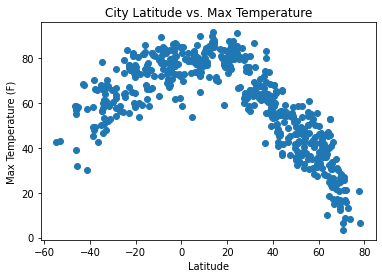

In [14]:
scatlat = weather_data["latitude"]
scattemp = weather_data["max_temp"]

plt.scatter(scatlat,scattemp)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatplotlatitudemaxtemp')
plt.show()

The plot proves that as we generally move away from the equator, temperature drops

## Latitude vs. Humidity Plot

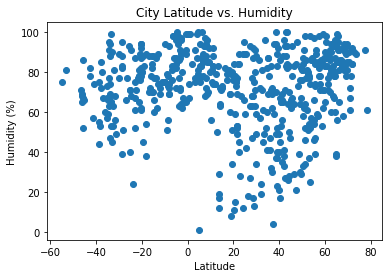

In [15]:
#scatlat = weather_data["Latitude"]
scathum = weather_data["humidity"]

plt.scatter(scatlat,scathum)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatplotlatitudehumidity')
plt.show()

The above plot shows a relatively spread-out distribution of data points. The humidity percentages seem to largely cluster above 50%.

## Latitude vs. Cloudiness Plot

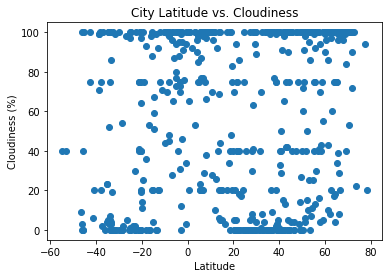

In [16]:

scatcloud = weather_data["cloudiness"]

plt.scatter(scatlat,scatcloud)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatplotlatitudecloudiness')
plt.show()

The plot in not showing any relationship in between cloudiness and city latitude. There seem to be some values for cloudiness that the points cluster along, noticeably 0, 20, 40, 75, 90, and 100, so those values may be rounded or categorized from some of the sources, and not represent continuous variables or measurements.

## Latitude vs. Wind Speed Plot

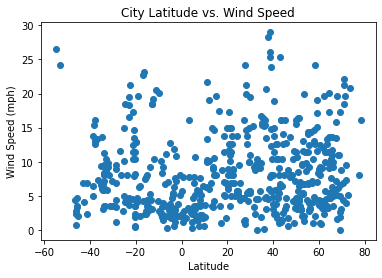

In [17]:
scatwindspeed = weather_data["windspeed"]

plt.scatter(scatlat,scatwindspeed)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatplotlatitudewindspeed')
plt.show()

The plot in not showing any relationship in between the wind speed and the latitude. Most of the wind speed values are below 25 mph, with only a few values above that wind speed limit.

## Linear Regression

In [18]:
# Create Northern and Southern Hemisphere DataFrames
# northern_df = weather_df.loc[pd.to_numeric(weather_df["latitude"]).astype(float) > 0, :]
# southern_df = weather_df.loc[pd.to_numeric(weather_df["latitude"]).astype(float) < 0, :]

northern = weather_df.loc[weather_df["latitude"] >= 0.0]
northern.reset_index(inplace=True)

southern = weather_df.loc[weather_df["latitude"] < 0.0]
southern.reset_index(inplace=True)


In [19]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"../output_data/fig{ifig}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.89486512607676


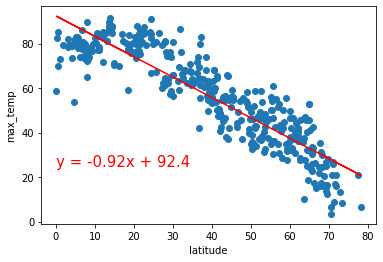

In [20]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

xlbl = "latitude"
ylbl = "max_temp"
lblpos = (0,25)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7208372545419608


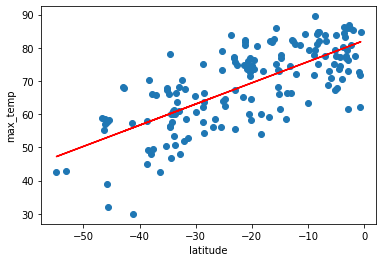

In [21]:
# southern Hemisphere - Max Temp vs. Latitude Linear Regression

xlbl = "latitude"
ylbl = "max_temp"
lblpos = (0,25)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,5)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10206069496104746


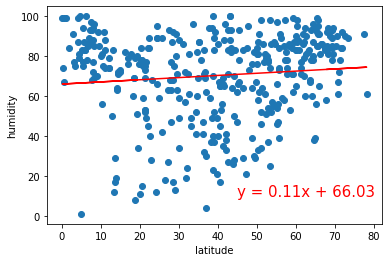

In [22]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "latitude"
ylbl = "humidity"
lblpos = (45,10)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3064082153543075


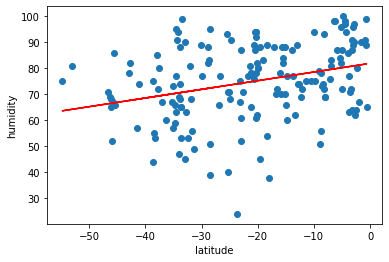

In [23]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "latitude"
ylbl = "humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16090660848995675


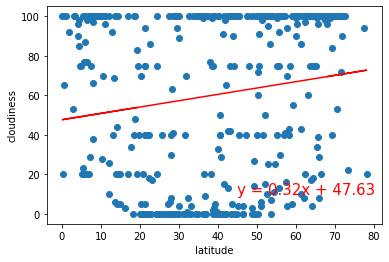

In [24]:

xlbl = "latitude"
ylbl = "cloudiness"
lblpos = (45,10)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.31971437924188195


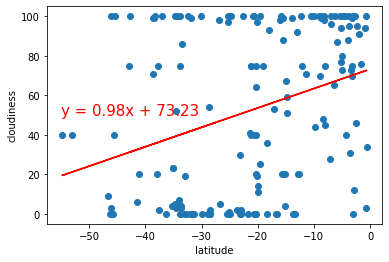

In [25]:
# Sourhern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "latitude"
ylbl = "cloudiness"
lblpos = (-55,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.14295138836505672


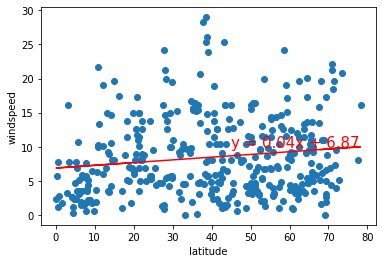

In [26]:
xlbl = "latitude"
ylbl = "windspeed"
lblpos = (45,10)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.20392681534522847


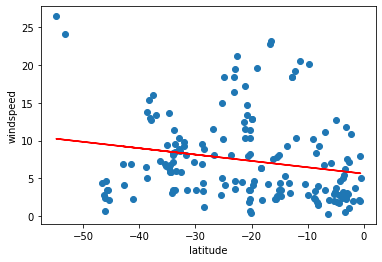

In [27]:
xlbl = "latitude"
ylbl = "windspeed"
lblpos = (-55,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)

Observations
The temperature and the latitude are consistent to each other. In the southern hemisphere, as you get closer to the equator the temperature increases. As latitude goes further away from equator, temperature also decreases
There seems to be no connection between humidity and latitude
Also the wind speed tends to be higher near the arctic and the antarctic